Install fbprophet package as follows:
```
!pip install fbprophet
```

If you encounter error, try:  

```
conda install -c conda-forge fbprophet
```


In [0]:
!pip install fbprophet

In [0]:
# import libraries
import pandas as pd # Import Numpy for data manipulation using dataframe
import numpy as np # Import Numpy for Data statistical Analysis
import seaborn as sns # Import Matplotlib for data analysis
import matplotlib.pyplot as plt
from fbprophet import Prophet

Import data for Eicher motors stock dataset

In [0]:
stock_dataset_csv = pd.read_csv("EICHERMOT.csv")
stock_dataset_csv.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2020-02-24,EICHERMOT,EQ,18848.65,18700.0,18700.0,17800.10,17995.00,17949.95,18254.19,192821,3.519792e+14,44028.0,75285.0,0.3904
1,2020-02-25,EICHERMOT,EQ,17949.95,18135.0,18230.0,17321.00,17555.05,17532.30,17572.72,256831,4.513220e+14,56676.0,104350.0,0.4063
2,2020-02-26,EICHERMOT,EQ,17532.30,17430.0,17600.0,17035.40,17237.30,17156.95,17285.51,215113,3.718339e+14,54182.0,50775.0,0.2360
3,2020-02-27,EICHERMOT,EQ,17156.95,17167.8,17248.0,16906.10,17085.00,17053.40,17044.09,255481,4.354441e+14,56698.0,107805.0,0.4220
4,2020-02-28,EICHERMOT,EQ,17053.40,16697.0,16848.0,16317.05,16610.10,16602.35,16528.57,326455,5.395835e+14,65354.0,148997.0,0.4564
5,2020-03-02,EICHERMOT,EQ,16602.35,16666.0,17782.9,16643.00,17013.40,17013.40,17290.64,348370,6.023539e+14,74505.0,32873.0,0.0944
6,2020-03-03,EICHERMOT,EQ,17013.40,17500.0,18041.0,17400.00,17950.00,17888.45,17694.39,274740,4.861358e+14,68868.0,57676.0,0.2099
7,2020-03-04,EICHERMOT,EQ,17888.45,17954.0,18280.0,16870.00,17171.55,17254.20,17301.52,418609,7.242574e+14,79891.0,148265.0,0.3542
8,2020-03-05,EICHERMOT,EQ,17254.20,17450.0,17888.0,17161.80,17765.55,17775.35,17626.16,231375,4.078253e+14,52927.0,46350.0,0.2003
9,2020-03-06,EICHERMOT,EQ,17775.35,17350.0,17871.5,16822.00,17810.00,17743.55,17461.91,170791,2.982337e+14,47537.0,32484.0,0.1902


Size of Eicher motor Dataset

 Its 63 days data 

In [0]:
stock_dataset_csv.shape

(63, 15)

Remove unnecessary columns

In [0]:
stock_dataset_csv.drop(["Symbol","Series","Prev Close","VWAP","Volume","Deliverable Volume"],axis=1,inplace=True)
stock_dataset_csv.head(10)

,Date,Open,High,Low,Last,Close,Turnover,Trades,%Deliverble
0,2020-02-24,18700.0,18700.0,17800.10,17995.00,17949.95,3.519792e+14,44028.0,0.3904
1,2020-02-25,18135.0,18230.0,17321.00,17555.05,17532.30,4.513220e+14,56676.0,0.4063
2,2020-02-26,17430.0,17600.0,17035.40,17237.30,17156.95,3.718339e+14,54182.0,0.2360
3,2020-02-27,17167.8,17248.0,16906.10,17085.00,17053.40,4.354441e+14,56698.0,0.4220
4,2020-02-28,16697.0,16848.0,16317.05,16610.10,16602.35,5.395835e+14,65354.0,0.4564
5,2020-03-02,16666.0,17782.9,16643.00,17013.40,17013.40,6.023539e+14,74505.0,0.0944
6,2020-03-03,17500.0,18041.0,17400.00,17950.00,17888.45,4.861358e+14,68868.0,0.2099
7,2020-03-04,17954.0,18280.0,16870.00,17171.55,17254.20,7.242574e+14,79891.0,0.3542
8,2020-03-05,17450.0,17888.0,17161.80,17765.55,17775.35,4.078253e+14,52927.0,0.2003
9,2020-03-06,17350.0,17871.5,16822.00,17810.00,17743.55,2.982337e+14,47537.0,0.1902


Plot Open values of stock w.r.t to date

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


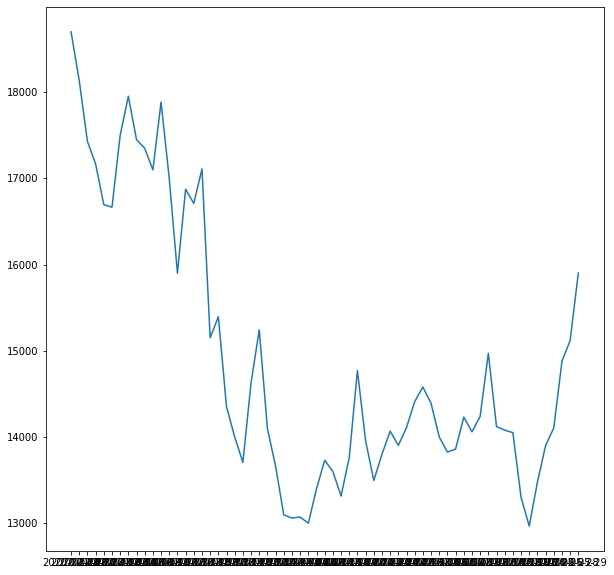

In [270]:
plt.figure(figsize=(10,10))
plt.plot(stock_dataset_csv["Date"],stock_dataset_csv["Open"])

Plot Open and Close values together

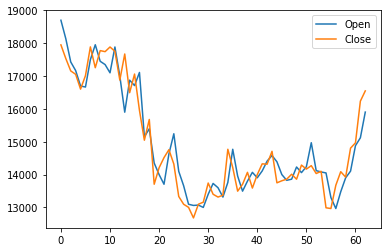

In [271]:
stock_dataset_csv.plot(y=["Open","Close"])

Import Novel corona cases dataset measured per day

In [272]:
corona_report_csv=pd.read_csv("india_day_wise.csv")
corona_report_csv.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


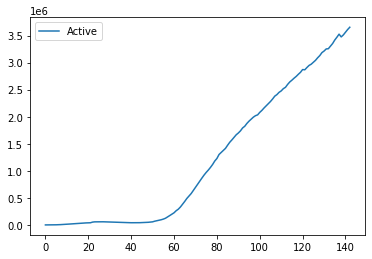

In [273]:
corona_report_csv.plot(y=["Active"])

Remove unnecessary columns

In [0]:
useless_cols = ["Deaths / 100 Cases","Recovered / 100 Cases","Deaths / 100 Recovered","No. of countries"]
corona_report_csv.drop(useless_cols,axis=1,inplace=True)

In [275]:
corona_report_csv.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,555,17,28,510,0,0,0
1,2020-01-23,654,18,30,606,99,1,2
2,2020-01-24,941,26,36,879,287,8,6
3,2020-01-25,1434,42,39,1353,493,16,3
4,2020-01-26,2118,56,52,2010,684,14,13


In order to merge two tables, they should have same primary key.

Changed the Key to Date in both the tables  

In [0]:
corona_report_csv.set_index("Date",inplace=True)

In [0]:
stock_dataset_csv.set_index("Date",inplace=True)

Join the COVID19 table with Stock table

In [278]:
data = stock_dataset_csv.join(corona_report_csv,how="inner")
data.head()

,Open,High,Low,Last,Close,Turnover,Trades,%Deliverble,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Date,,,,,,,,,,,,,,,
2020-02-24,18700.0,18700.0,17800.10,17995.00,17949.95,3.519792e+14,44028.0,0.3904,78834,2626,25224,50984,567,160,1833
2020-02-25,18135.0,18230.0,17321.00,17555.05,17532.30,4.513220e+14,56676.0,0.4063,79681,2705,27902,49074,847,79,2678
2020-02-26,17430.0,17600.0,17035.40,17237.30,17156.95,3.718339e+14,54182.0,0.2360,80641,2766,30371,47504,960,61,2469
2020-02-27,17167.8,17248.0,16906.10,17085.00,17053.40,4.354441e+14,56698.0,0.4220,81999,2810,33261,45928,1358,44,2890
2020-02-28,16697.0,16848.0,16317.05,16610.10,16602.35,5.395835e+14,65354.0,0.4564,83365,2866,36695,43804,1366,56,3434


Calculate the correlation between Stock data and corona data

In [279]:
data.corr()

,Open,High,Low,Last,Close,Turnover,Trades,%Deliverble,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Open,1.000000,0.947808,0.977249,0.942637,0.943038,0.284973,0.079392,0.143781,-0.546706,-0.555840,-0.435835,-0.609777,-0.833894,-0.855063,-0.534852
High,0.947808,1.000000,0.936600,0.950156,0.956371,0.361446,0.191765,0.173815,-0.554711,-0.570942,-0.431958,-0.624728,-0.821349,-0.866837,-0.549896
Low,0.977249,0.936600,1.000000,0.970441,0.971249,0.328881,0.109652,0.085908,-0.504492,-0.513591,-0.391582,-0.569693,-0.808578,-0.832758,-0.491293
Last,0.942637,0.950156,0.970441,1.000000,0.999096,0.393140,0.203628,0.063155,-0.486592,-0.500022,-0.367055,-0.556028,-0.784647,-0.817052,-0.479038
Close,0.943038,0.956371,0.971249,0.999096,1.000000,0.403420,0.214199,0.068395,-0.486905,-0.501230,-0.365814,-0.557267,-0.783780,-0.820551,-0.480272
Turnover,0.284973,0.361446,0.328881,0.393140,0.403420,1.000000,0.929984,-0.006051,0.202425,0.166129,0.285060,0.147883,0.060792,-0.081254,0.218873
Trades,0.079392,0.191765,0.109652,0.203628,0.214199,0.929984,1.000000,0.019849,0.222524,0.185583,0.280148,0.184402,0.186809,0.084923,0.240702
%Deliverble,0.143781,0.173815,0.085908,0.063155,0.068395,-0.006051,0.019849,1.000000,-0.525861,-0.527717,-0.533615,-0.510935,-0.339319,-0.205674,-0.448198
Confirmed,-0.546706,-0.554711,-0.504492,-0.486592,-0.486905,0.202425,0.222524,-0.525861,1.000000,0.996718,0.983304,0.993430,0.855959,0.607103,0.927206
Deaths,-0.555840,-0.570942,-0.513591,-0.500022,-0.501230,0.166129,0.185583,-0.527717,0.996718,1.000000,0.968947,0.996823,0.854036,0.626772,0.921365


I am using Seaborn to plot the time series

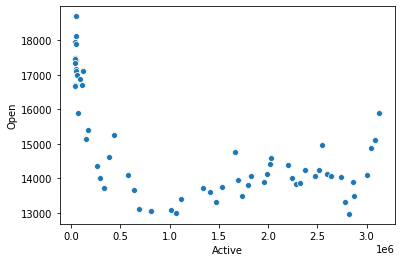

In [0]:
x = data["Active"]
y = data["Open"]
sns.scatterplot(x,y)

From the graph it can be observed that there is a steep fall in stock value as number of corona cases in the world increased from 0 to 1 Million. Interestingly as people started digesting the COVID19 reality, the stock price started improving gradually.  

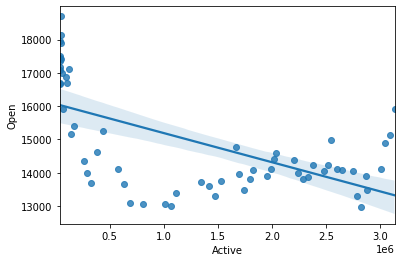

In [0]:
sns.regplot(x,y)

# Machine learning
Machine learning Part consists of two parts

(1) Eicher Motors stock market prediction

(2) Crude oil value prediction

In [0]:
stock_df=pd.read_csv("EICHERMOT.csv")
stock_df.set_index("Date",inplace=True)
corona_df=pd.read_csv("india_day_wise.csv")
corona_df.set_index("Date",inplace=True)
data = stock_df.join(corona_df,how="inner")
stock_data = data.reset_index()
stock_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-02-24,EICHERMOT,EQ,18848.65,18700.0,18700.0,17800.10,17995.00,17949.95,18254.19,192821,3.519792e+14,44028.0,75285.0,0.3904,78834,2626,25224,50984,567,160,1833,3.33,32.00,10.41,35
1,2020-02-25,EICHERMOT,EQ,17949.95,18135.0,18230.0,17321.00,17555.05,17532.30,17572.72,256831,4.513220e+14,56676.0,104350.0,0.4063,79681,2705,27902,49074,847,79,2678,3.39,35.02,9.69,40
2,2020-02-26,EICHERMOT,EQ,17532.30,17430.0,17600.0,17035.40,17237.30,17156.95,17285.51,215113,3.718339e+14,54182.0,50775.0,0.2360,80641,2766,30371,47504,960,61,2469,3.43,37.66,9.11,46
3,2020-02-27,EICHERMOT,EQ,17156.95,17167.8,17248.0,16906.10,17085.00,17053.40,17044.09,255481,4.354441e+14,56698.0,107805.0,0.4220,81999,2810,33261,45928,1358,44,2890,3.43,40.56,8.45,50
4,2020-02-28,EICHERMOT,EQ,17053.40,16697.0,16848.0,16317.05,16610.10,16602.35,16528.57,326455,5.395835e+14,65354.0,148997.0,0.4564,83365,2866,36695,43804,1366,56,3434,3.44,44.02,7.81,56


Prepare the input dataset before applying the Facebook Prophet tool

In [0]:
stock_prophet_open = stock_data[['Date','Open']]
stock_prophet_open = stock_prophet_open.rename(columns = {'Date': 'ds', 'Open': 'y'})
stock_prophet_open

,ds,y
0,2020-02-24,18700.0
1,2020-02-25,18135.0
2,2020-02-26,17430.0
3,2020-02-27,17167.8
4,2020-02-28,16697.0
...,...,...
58,2020-05-22,13901.0
59,2020-05-26,14105.0
60,2020-05-27,14880.0
61,2020-05-28,15120.0


Prophet is open source software released by Faceook's core Datascience team

In [0]:
m = Prophet()
m.fit(stock_prophet_open)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Lets develop the model and make prediction of stock value of Eicher motors for next 30 days

In [0]:
future = m.make_future_dataframe(periods = 30)
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-24,10146.894124,17552.429936,19206.893938,10146.894124,10146.894124,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,0.0,0.0,0.0,18381.442628
1,2020-02-25,10029.553634,17249.162802,18817.550200,10029.553634,10029.553634,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,0.0,0.0,0.0,18015.089520
2,2020-02-26,9912.213145,17257.719387,18850.547069,9912.213145,9912.213145,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,0.0,0.0,0.0,18047.811052
3,2020-02-27,9794.872655,17029.604928,18694.163159,9794.872655,9794.872655,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,0.0,0.0,0.0,17867.257792
4,2020-02-28,9677.532166,17024.210368,18650.008161,9677.532166,9677.532166,8160.240069,8160.240069,8160.240069,8160.240069,8160.240069,8160.240069,0.0,0.0,0.0,17837.772235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-06-22,6495.473264,13857.564403,15589.155255,6200.574094,6780.468549,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,8234.548505,0.0,0.0,0.0,14730.021769
79,2020-06-23,6507.083042,13589.433681,15397.119232,6193.947909,6807.696485,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,7985.535885,0.0,0.0,0.0,14492.618927
80,2020-06-24,6518.692820,13768.006419,15606.738702,6186.355437,6836.231516,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,8135.597907,0.0,0.0,0.0,14654.290727
81,2020-06-25,6530.302597,13678.942612,15552.505465,6177.083922,6865.862573,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,8072.385137,0.0,0.0,0.0,14602.687734


Plot of existing and forecasted values of stock market



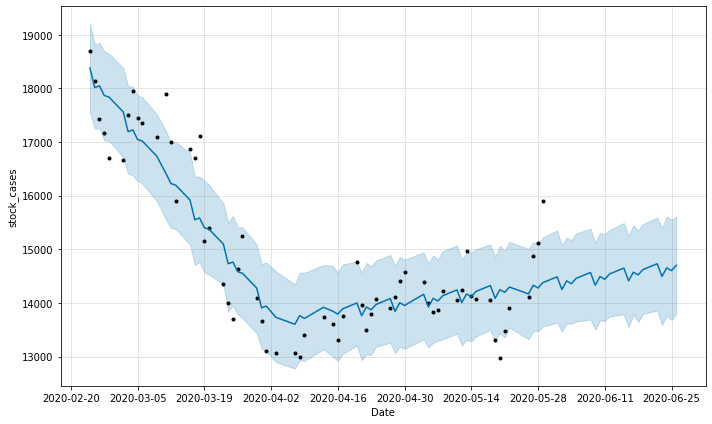

In [0]:
figure = m.plot(forecast,xlabel = 'Date', ylabel='stock_cases') 

There are two additional graphs:

(1) Trend of stock market value

(2) stock values based on the day

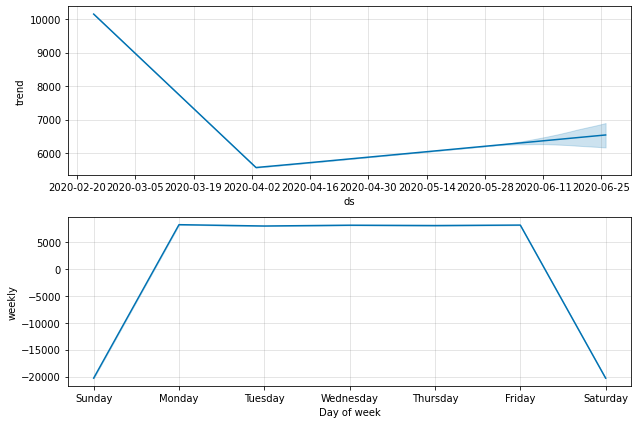

In [0]:
figure2 = m.plot_components(forecast)

# Predict the corona cases for next 30 days

Prepare the corona dataset to perform prediction using facebook prophet

In [0]:
stock_prophet_corona = stock_data[['Date','Active']]
stock_prophet_corona = stock_prophet_corona.rename(columns = {'Date': 'ds', 'Active': 'y'})
stock_prophet_corona

,ds,y
0,2020-02-24,50984
1,2020-02-25,49074
2,2020-02-26,47504
3,2020-02-27,45928
4,2020-02-28,43804
...,...,...
58,2020-05-22,2866801
59,2020-05-26,3006396
60,2020-05-27,3041501
61,2020-05-28,3088694


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


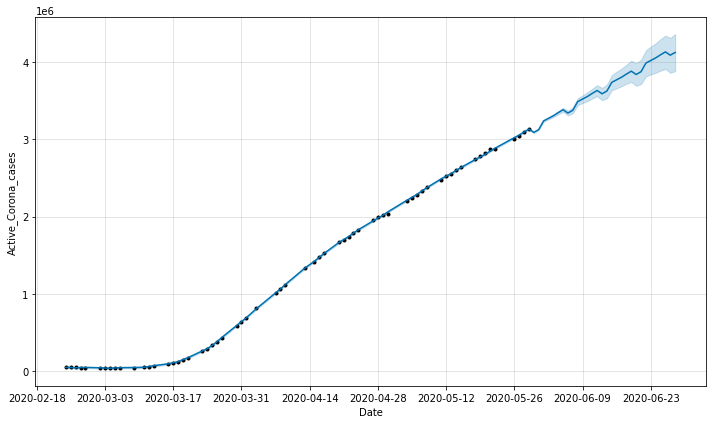

In [0]:
n = Prophet()
n.fit(stock_prophet_corona)
future = n.make_future_dataframe(periods = 30)
forecast_corona = n.predict(future)
figure = n.plot(forecast_corona,xlabel = 'Date', ylabel='Active_Corona_cases') 

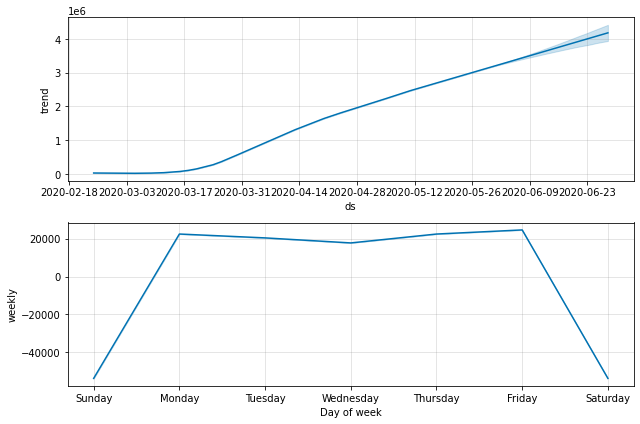

In [0]:
figure2 = n.plot_components(forecast_corona)